# More POS Analysis
Here, I will look at POS frequencies and add some columns to my data

In [1]:
import pandas as pd

In [2]:
movie_df = pd.read_pickle(r'C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_tagged_dialogue.pkl')

In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13442 entries, 0 to 14095
Data columns (total 17 columns):
Disney_Period       13442 non-null object
Gender              13442 non-null object
Movie               13442 non-null object
Role                13442 non-null object
Song                13442 non-null object
Speaker             13442 non-null object
Speaker_Status      13442 non-null object
Text                13442 non-null object
UTTERANCE_NUMBER    13442 non-null int64
Year                13442 non-null int64
Tokens              13442 non-null object
Types               13442 non-null object
Token_Count         13442 non-null int64
Type_Count          13442 non-null int64
POS                 13442 non-null object
Tag_Freq            13442 non-null object
Command_Count       13442 non-null int64
dtypes: int64(5), object(12)
memory usage: 1.2+ MB


## Tag Frequencies
What are the top POS tags by gender and role?

In [24]:
movie_df['Tag_Freq'].iloc[0].most_common(1)[0][0]

[('NN', 9),
 ('IN', 3),
 ('.', 3),
 ('DT', 2),
 ('JJ', 2),
 ('VB', 2),
 ('VBN', 1),
 ('JJS', 1),
 ('CC', 1),
 ('VBP', 1),
 ('PRP', 1)]

In [15]:
movie_df['Top_Tag'] = movie_df.Tag_Freq.map(lambda x: x.most_common(1)[0][0])

In [16]:
movie_df.Top_Tag.value_counts()

NN      5285
.       1475
PRP     1338
RB      1003
DT       782
VB       687
JJ       501
IN       309
WP       281
NNS      258
VBP      236
UH       227
,        220
CC       173
:        104
WRB       90
VBZ       74
VBD       73
PRP$      66
VBN       59
VBG       40
CD        39
MD        33
TO        22
WDT       21
EX        19
RP         6
``         6
RBR        5
FW         2
JJR        2
PDT        2
JJS        2
''         1
RBS        1
Name: Top_Tag, dtype: int64

In [17]:
movie_df.Top_Tag.unique()

array(['NN', 'DT', 'JJ', 'UH', 'VB', ',', '.', 'NNS', 'PRP', 'CC', 'IN',
       'VBN', 'VBP', 'VBZ', 'RB', 'WP', 'WDT', 'WRB', "''", 'RP', 'MD',
       'VBD', 'PRP$', 'CD', 'VBG', 'FW', ':', 'EX', 'TO', 'PDT', 'RBR',
       'RBS', 'JJR', '``', 'JJS'], dtype=object)

In [21]:
movie_df.groupby('Gender')['Top_Tag'].value_counts()

Gender  Top_Tag
f       NN         1596
        .           463
        PRP         425
        RB          326
        DT          254
        VB          214
        JJ          148
        WP          106
        UH           92
        NNS          89
        IN           81
        CC           78
        VBP          70
        ,            60
        WRB          35
        :            28
        VBD          26
        PRP$         24
        VBZ          21
        VBN          20
        MD           15
        WDT          10
        VBG           9
        EX            7
        TO            7
        CD            6
        RBR           2
        RP            2
        FW            1
        ``            1
                   ... 
m       WDT          11
        ``            5
        RP            4
        RBR           3
        JJR           2
        JJS           2
        PDT           2
        ''            1
        FW            1
        RBS           1


In [22]:
movie_df.groupby('Role')['Top_Tag'].value_counts()

Role    Top_Tag
ANT     NN          759
        .           242
        PRP         200
        RB          141
        VB          135
        DT          130
        JJ           82
        IN           59
        NNS          40
        WP           35
        VBP          32
        ,            27
        CC           24
        UH           22
        :            16
        PRP$         16
        VBZ          16
        WRB          13
        CD           10
        VBD           8
        VBN           8
        VBG           6
        TO            5
        WDT           3
        ``            3
        MD            2
        RBR           2
        EX            1
HELPER  NN         1425
        .           378
                   ... 
PRO     NN         2169
        .           654
        PRP         601
        RB          439
        DT          373
        VB          287
        JJ          205
        WP          153
        IN          124
        NNS         122


In [26]:
movie_df[movie_df.Gender == 'm']['Top_Tag'].value_counts()

NN      3536
.        979
PRP      890
RB       662
DT       517
VB       456
JJ       337
IN       218
WP       172
NNS      163
VBP      159
,        158
UH       134
CC        92
:         73
WRB       53
VBZ       52
VBD       46
PRP$      42
VBN       36
VBG       31
CD        31
MD        18
TO        15
EX        12
WDT       11
``         5
RP         4
RBR        3
JJS        2
JJR        2
PDT        2
RBS        1
''         1
FW         1
Name: Top_Tag, dtype: int64

## Adjectives
First, let's add a column of adjective count by line. Then we'll add a column for adjective count divided by the total token count of the line

In [27]:
movie_df['Adj_Count'] = movie_df['Tag_Freq'].map(lambda x: x['JJ']+x['JJR']+x['JJS'])

In [28]:
movie_df['Adj_over_Tokens'] = movie_df.Adj_Count / movie_df.Token_Count

In [29]:
movie_df.Adj_over_Tokens.describe() #some REALLY small numbers here

count    13442.000000
mean         0.048808
std          0.079000
min          0.000000
25%          0.000000
50%          0.000000
75%          0.083333
max          1.000000
Name: Adj_over_Tokens, dtype: float64

In [32]:
from matplotlib import pyplot as plt

In [30]:
adj_by_gen = movie_df.groupby('Gender')['Adj_Count'].describe()['mean']

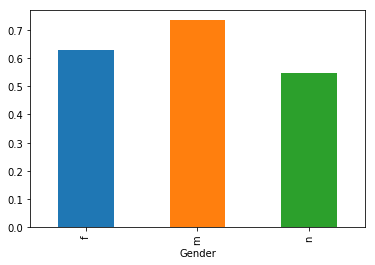

In [33]:
adj_by_gen.plot.bar()

In [34]:
adj_av_by_gen = movie_df.groupby('Gender')['Adj_over_Tokens'].describe()['mean']

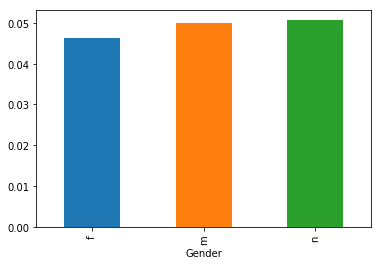

In [35]:
adj_av_by_gen.plot.bar()

In [37]:
adj_by_role = movie_df.groupby('Role')['Adj_Count'].describe()['mean']

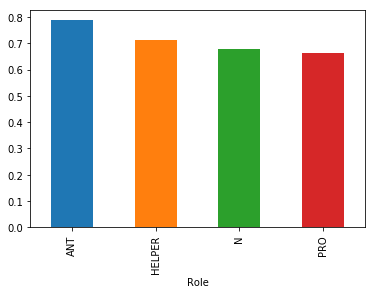

In [38]:
adj_by_role.plot.bar()

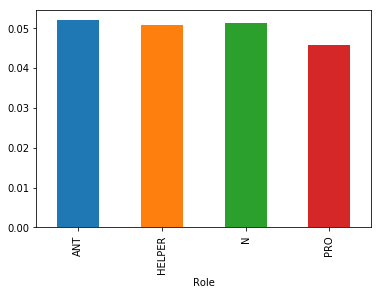

In [39]:
adj_av_by_role = movie_df.groupby('Role')['Adj_over_Tokens'].describe()['mean']
adj_av_by_role.plot.bar()

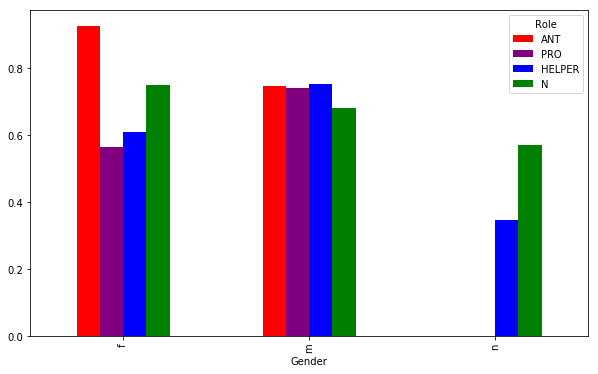

In [41]:
adj_by_gen_role = movie_df.groupby(['Gender','Role'], sort=False)["Adj_Count"].describe()['mean']
adj_by_gen_role.unstack().plot.bar(color = ['red','purple', 'blue', 'green'], figsize = (10,6))

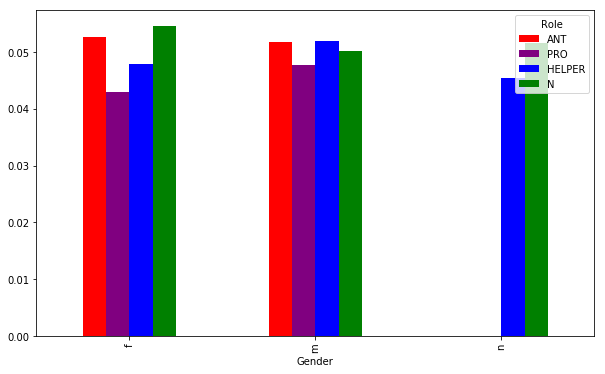

In [42]:
adj_av_by_gen_role = movie_df.groupby(['Gender','Role'], sort=False)["Adj_over_Tokens"].describe()['mean']
adj_av_by_gen_role.unstack().plot.bar(color = ['red','purple', 'blue', 'green'], figsize = (10,6))

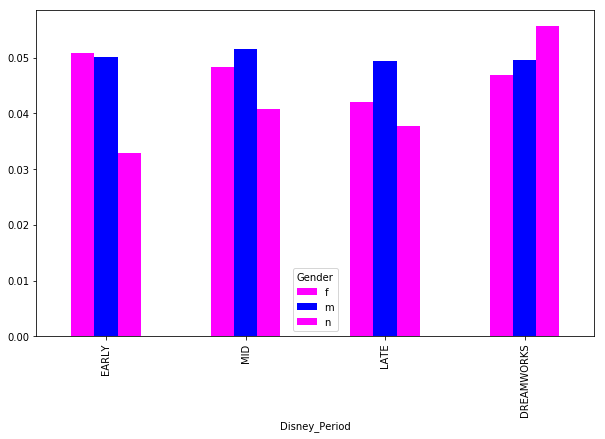

In [43]:
adj_av_by_gen_era = movie_df.groupby(['Disney_Period','Gender'], sort=False)["Adj_over_Tokens"].describe()['mean']
adj_av_by_gen_era.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (10,6))

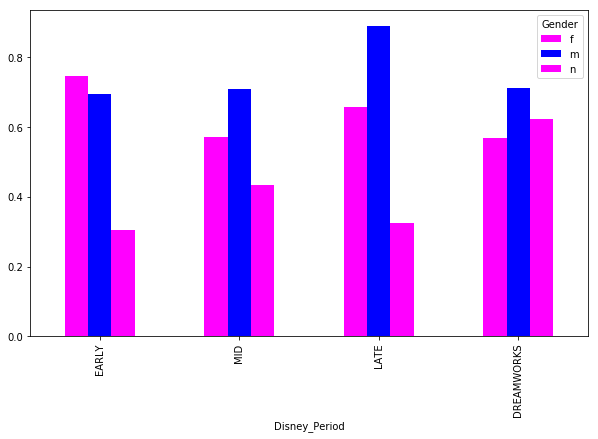

In [44]:
adj_by_gen_era = movie_df.groupby(['Disney_Period','Gender'], sort=False)["Adj_Count"].describe()['mean']
adj_by_gen_era.unstack().plot.bar(color = ['magenta', 'blue'], figsize = (10,6))

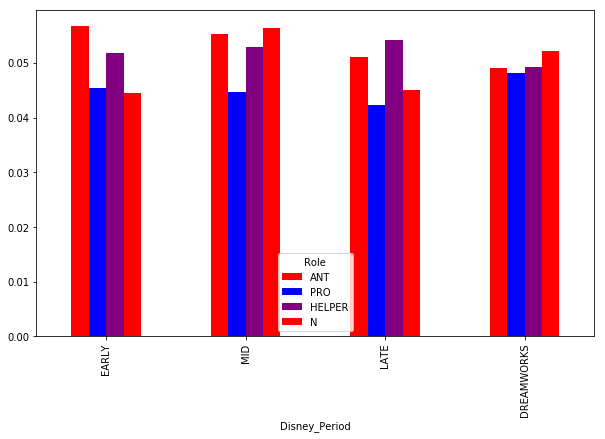

In [46]:
adj_av_by_role_era = movie_df.groupby(['Disney_Period','Role'], sort=False)["Adj_over_Tokens"].describe()['mean']
adj_av_by_role_era.unstack().plot.bar(color = ['red', 'blue', 'purple'], figsize = (10,6))

## Interjections
Perhaps interjections could be a sign of confidence? First, let's see what kinds of interjections we've got

In [47]:
movie_df['POS'].iloc[0]

[('slave', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('magic', 'JJ'),
 ('mirror', 'NN'),
 ('come', 'VBN'),
 ('from', 'IN'),
 ('the', 'DT'),
 ('farthest', 'JJS'),
 ('space', 'NN'),
 ('through', 'IN'),
 ('wind', 'NN'),
 ('and', 'CC'),
 ('darkness', 'NN'),
 ('i', 'NN'),
 ('summon', 'VBP'),
 ('thee', 'NN'),
 ('.', '.'),
 ('speak', 'NN'),
 ('!', '.'),
 ('let', 'VB'),
 ('me', 'PRP'),
 ('see', 'VB'),
 ('thy', 'JJ'),
 ('face', 'NN'),
 ('.', '.')]

In [48]:
movie_df['Interjection_Count'] = movie_df['Tag_Freq'].map(lambda x: x['UH'])

In [49]:
movie_df['Inter_over_Tokens'] = movie_df.Interjection_Count / movie_df.Token_Count

In [53]:
movie_df[movie_df.Interjection_Count >= 1].shape

(1072, 22)

In [55]:
movie_df[movie_df.Interjection_Count >= 1][['Speaker','POS']]

,Speaker,POS
9,snow white,"[(oh, UH), (!, .)]"
11,snow white,"[(oh, UH), (., .)]"
14,guard,"[(yes, UH), (,, ,), (your, PRP$), (majesty, NN..."
18,guard,"[(yes, UH), (,, ,), (your, PRP$), (majesty, NN..."
21,snow white,"[(hello, NN), (there, RB), (., .), (what, WP),..."
29,snow white,"[(oh, UH), (!, .), (please, NN), (,, ,), (do, ..."
37,snow white,"[(will, MD), (you, PRP), (take, VB), (me, PRP)..."
38,snow white,"[(hello, NNS), (?, .), (may, MD), (i, VB), (co..."
55,snow white,"[(oh, UH), (,, ,), (what, WP), (adorable, JJ),..."
56,snow white,"[(what, WP), (funny, VBZ), (names, NNS), (for,..."


In [56]:
inter_av_by_gen = movie_df.groupby('Gender')['Inter_over_Tokens'].describe()['mean']

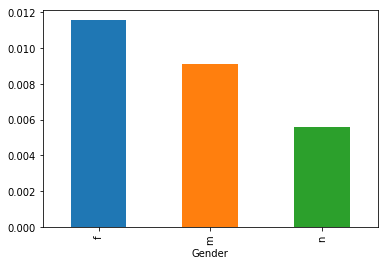

In [57]:
inter_av_by_gen.plot.bar()

In [59]:
inter = []
for line in movie_df.POS:
    for word in line:
        if word[1] == 'UH':
            inter.append(word[0])

In [60]:
len(inter)

1256

In [61]:
len(set(inter))

28

In [62]:
set(inter)

{"'please",
 '.stop',
 'ah',
 'boy',
 'brah',
 'em',
 'hello',
 'hey',
 'hi',
 'hubert',
 'kitty',
 'listen',
 'mama',
 'no',
 'o.k.',
 'oh',
 'ok',
 'okay',
 'olaf',
 'ooh',
 'oooh',
 'ow',
 'uh',
 'well',
 'yeah',
 'yes',
 'yow',
 'z'}

Pretty cool that it was able to label some character names as interjections. But looking at them, they're such a mix of things that they don't really tell much about confidence of the speaker. 